Le champ d’utilisation des images numériques est très vaste. Si l’on se focalise sur leur utilisation en physique en général et en mécanique ou en science des matériaux en particulier, on peut définir quatre grands types d’utilisation

- **Les images d’illustration** : on veut, par exemple, conserver la trace d’un dispositif d’essai ou d’une configuration particulière ;
- **Les images d’observation** : par exemple en métallurgie, on souhaite capitaliser un certain nombre d’observations, et on a une exploitation plutôt qualitative de l’image ;
- **Les images quantitatives en relatif** : on s’intéresse par exemple à un contraste de phase, et on veut quantifier des rapports surfaciques ou une topologie particulière ; la valeur relative d’un canal pour un pixel est importante mais la valeur absolue n’est pas essentielle ;
- **Les images quantitatives** : La valeur d’un canal pour un pixel peut être reliée directement à une grandeur physique.

Pour ces quatre types, il peut être intéressant de regrouper les images produites au cours d’une séance d’observation ou d’un essai dans un objet *Album* qui pourra être sauvegardé dans un fichier *EDF*.

Les images quantitatives peuvent être aquises ou cours d’un essais et avoir pour but de mesurer une évolution du champ observé en fonction d’un paramètre de chargement (le temps, un niveau de déformation, ...). On pourra alors regrouper les images produites dans un objet Sequence qui permettra de conserver le lien entre chaque image et la valeur correspondante du paramètre de chargement.

In [1]:
import numpy as np
from madnex.data.image import MapImage
import scipy
import scipy.misc
lena = scipy.misc.ascent()
lena

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [2]:
lena = lena.astype('uint8')
lena.dtype

dtype('uint8')

In [3]:
my_image = MapImage(lena) # équivalent à my_image = MapImage(image = lena)

Le tableau contenant les données de l’image est accessible par le paramètre image :

In [4]:
my_image.image

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]], dtype=uint8)

Les autres paramètres sont déduits directement du tableau fourni en paramètres :

In [5]:
my_image.get_encoding_type()

'uint8'

In [6]:
my_image.get_size()

(512, 512)

In [7]:
my_image.get_Nb_component()

1

In [8]:
my_image.get_encoding_mode()

'L'

Dans le cas d’une image en couleur, il est nécessaire de préciser le mode d’encodage. Le nombre de composantes est valorisé par défaut à partir de la taille de la dernière dimension du tableau contenant l’image.

In [9]:
import scipy.ndimage
lenaC = scipy.ndimage.imread('lena_RGBA.png')
my_image = MapImage(lenaC)#, encoding_mode = 'RGBA')
my_image.get_Nb_component()

2017-02-08 17:39:41,784 PngImagePlugin.py (135) : [DEBUG] STREAM 'IHDR' 16 13
2017-02-08 17:39:41,786 PngImagePlugin.py (135) : [DEBUG] STREAM 'sRGB' 41 1
2017-02-08 17:39:41,787 PngImagePlugin.py (542) : [DEBUG] 'sRGB' 41 1 (unknown)
2017-02-08 17:39:41,788 PngImagePlugin.py (135) : [DEBUG] STREAM 'pHYs' 54 9
2017-02-08 17:39:41,790 PngImagePlugin.py (135) : [DEBUG] STREAM 'tIME' 75 7
2017-02-08 17:39:41,791 PngImagePlugin.py (542) : [DEBUG] 'tIME' 75 7 (unknown)
2017-02-08 17:39:41,792 PngImagePlugin.py (135) : [DEBUG] STREAM 'bKGD' 94 6
2017-02-08 17:39:41,793 PngImagePlugin.py (542) : [DEBUG] 'bKGD' 94 6 (unknown)
2017-02-08 17:39:41,794 PngImagePlugin.py (135) : [DEBUG] STREAM 'IDAT' 112 572045


4

In [10]:
my_image.get_size()

(512, 512)

### Modifications de l’objet MapImage

Un objet MapImage peut etre modifié :

- Soit par surcharge (on remplace une partie des données qui le compose par d’autre)
- Soit en modifiant la façon dont le tableau de données est structuré.
### La surcharge

Le contenu de l’objet MapImage peut être modifié en surchargeant directement les attributs correspondant aux paramètres du constructeur :

- image
- dimension
- encoding_mode
- name
- key_words
- comment

```
Note :Les attributs image, dimension et encoding_mode sont liés. Il appartient à l’utilisateur maintenir leur cohérence. Si l’on surcharge un objet MapImage contenant une image en niveau de gris avec une image encodée en RGB, il est nécessaire de valoriser également l’attribut encoding_mode à RGB.
```
Les attributs Nb_component, size et encoding_type sont evalués dynamiquement lorsqu’on les appelle. Il sont donc toujours cohérents avec l’atttribut image qui contient le tableau de l’image :


In [11]:
my_image = MapImage(lena)
my_image.get_encoding_type()

'uint8'

In [12]:
lena_16b = lena.astype('uint16')
my_image.image = lena_16b
my_image.get_encoding_type()

'uint16'

In [13]:
my_image = MapImage(lenaC)#, encoding_mode = 'RGBA')
import matplotlib.pyplot as plt
plt.imshow(my_image.image)

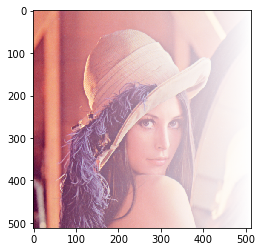

In [14]:
plt.show() # On affiche l'image d'origine

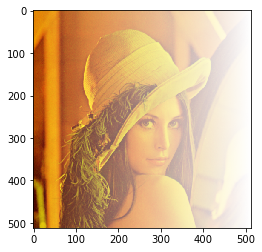

In [15]:
my_image.asData() # On modifie la structure du tableau selon la convention CYX
my_image.image[2] = 0 # On met à 0 le canal 2 qui correspond à la composante bleue en RGB
my_image.asImage() # On revient à la structure usuelle pour permettre l'affichage
plt.imshow(my_image.image)
plt.show() # On affiche l'image modifiée

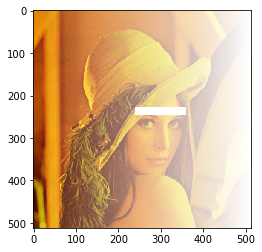

In [16]:
my_image.asCoord()
my_image.image[240:360,265:285,:] = 255
my_image.asImage()
plt.imshow(my_image.image)
plt.show() # On affiche l'image modifiée